# 09-08 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)

출처: https://wikidocs.net/33793

이번에는 케라스의 임베딩 층(embedding layer) 과 사전 훈련된 워드 임베딩(pre-trained word embedding) 을 가져와서 사용하는 것을 비교

* 1. 케라스 임베딩 층(Keras Embedding layer)

## 1) 임베딩 층은 룩업 테이블이다.

임베딩 층의 입력으로 사용하기 위해서 입력 시퀀스의 각 단어들은 모두 정수 인코딩이 되어있어야 합니다.

어떤 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터

임베딩 층은 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 이 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련됩니다. 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됩니다. 그리고 이 밀집 벡터를 임베딩 벡터라고 부릅니다.

정수를 밀집 벡터 또는 임베딩 벡터로 맵핑한다는 것은 어떤 의미일까요? 특정 단어와 맵핑되는 정수를 인덱스로 가지는 테이블로부터 임베딩 벡터 값을 가져오는 룩업 테이블이라고 볼 수 있습니다. 그리고 이 테이블은 단어 집합의 크기만큼의 행을 가지므로 모든 단어는 고유한 임베딩 벡터를 가집니다.




In [1]:
from IPython.display import Image

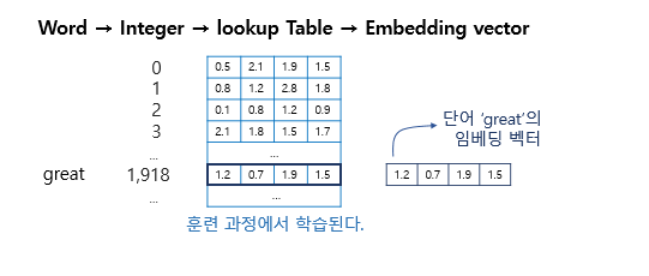

In [3]:
Image("image/09-08 Pre-trained Word Embedding.png")

위의 그림은 단어 great이 정수 인코딩 된 후 테이블로부터 해당 인덱스에 위치한 임베딩 벡터를 꺼내오는 모습을 보여줍니다. 위의 그림에서는 임베딩 벡터의 차원이 4로 설정되어져 있습니다. 그리고 단어 great은 정수 인코딩 과정에서 1,918의 정수로 인코딩이 되었고 그에 따라 단어 집합의 크기만큼의 행을 가지는 테이블에서 인덱스 1,918번에 위치한 행을 단어 great의 임베딩 벡터로 사용합니다. 이 임베딩 벡터는 모델의 입력이 되고, 역전파 과정에서 단어 great의 임베딩 벡터값이 학습됩니다.

룩업 테이블의 개념을 이론적으로 우선 접하고, 처음 케라스를 배울 때 어떤 분들은 임베딩 층의 입력이 원-핫 벡터가 아니어도 동작한다는 점에 헷갈려 합니다. 앞서 NNLM이나 Word2Vec을 설명할 때 룩업 테이블을 언급하면서 입력을 원-핫 벡터로 가정하고 설명드렸기 때문인데, 케라스는 단어를 정수 인덱스로 바꾸고 원-핫 벡터로 변환 후 임베딩 층의 입력으로 사용하는 것이 아니라, 단어를 정수 인코딩까지만 진행 후 임베딩 층의 입력으로 사용하여 룩업 테이블 결과인 임베딩 벡터를 리턴합니다.

vocab_size = 20000
output_dim = 128
input_length = 500

v = Embedding(vocab_size, output_dim, input_length=input_length)

임베딩 층은 다음과 같은 세 개의 인자를 받습니다.

vocab_size = 텍스트 데이터의 전체 단어 집합의 크기입니다.
output_dim = 워드 임베딩 후의 임베딩 벡터의 차원입니다.
input_length = 입력 시퀀스의 길이입니다. 만약 갖고있는 각 샘플의 길이가 500개이라면 이 값은 500입니다.


## 2) 임베딩 층 사용하기

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

출처: https://wikidocs.net/33930

In [2]:

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1 # 패딩을 고려하여 +1
print('단어 집합 :',vocab_size)

단어 집합 : 16


In [4]:

X_encoded = tokenizer.texts_to_sequences(sentences)
print(X_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [5]:
X_encoded = tokenizer.texts_to_sequences(sentences)
print('정수 인코딩 결과 :',X_encoded)

정수 인코딩 결과 : [[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [6]:
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


In [7]:
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

패딩 결과 :
[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.7013 - acc: 0.2857 - 404ms/epoch - 404ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6995 - acc: 0.2857 - 2ms/epoch - 2ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6978 - acc: 0.2857 - 2ms/epoch - 2ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6961 - acc: 0.2857 - 2ms/epoch - 2ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6944 - acc: 0.4286 - 3ms/epoch - 3ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6927 - acc: 0.4286 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6910 - acc: 0.4286 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6893 - acc: 0.4286 - 2ms/epoch - 2ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6876 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6860 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6843 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6827 - acc: 0.8571 - 2ms/epoch - 2ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6810 - acc: 0.8571 - 3ms/epoch - 3ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6794 - acc:

# 2. 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기

때로는 이미 훈련되어져 있는 워드 임베딩을 가져와서 이를 임베딩 벡터

훈련 데이터가 적은 상황이라면 케라스의 Embedding()으로 해당 문제를 풀기에 최적화 된 임베딩 벡터값을 얻는 것이 쉽지 않습니다. 이 경우 해당 문제에 특화된 것은 아니지만 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다


In [9]:
print(X_train)


[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [10]:
print(y_train)


[1 0 0 1 1 0 1]


# 1) 사전 훈련된 GloVe 사용하기

glove.6B.zip를 다운로드하고 압축을 풀면 다수의 파일이 존재하는데 여기서는 glove.6B.100d.txt 파일을 사용합니다.

In [11]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [12]:
# glove.6B.100d.txt에 있는 모든 임베딩 벡터들을 불러옵니다. 
# 파이썬의 자료구조 딕셔너리(dictionary)를 사용하며, 로드한 임베딩 벡터의 개수를 확인합니다.

embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [13]:
print(embedding_dict['respectable'])
print('벡터의 차원 수 :',len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

In [14]:

# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
embedding_matrix = np.zeros((vocab_size, 100))
np.shape(embedding_matrix)

(16, 100)

In [15]:
print(tokenizer.word_index.items())

# 기존 데이터의 각 단어와 맵핑된 정수값을 확인해봅시다.



dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [16]:
tokenizer.word_index['great']

# 단어 'great'의 맵핑된 정수는 2입니다.



2

In [17]:
print(embedding_dict['great'])

# 사전 훈련된 GloVe에서 'great'의 벡터값을 확인합니다.



[-0.013786   0.38216    0.53236    0.15261   -0.29694   -0.20558
 -0.41846   -0.58437   -0.77355   -0.87866   -0.37858   -0.18516
 -0.128     -0.20584   -0.22925   -0.42599    0.3725     0.26077
 -1.0702     0.62916   -0.091469   0.70348   -0.4973    -0.77691
  0.66045    0.09465   -0.44893    0.018917   0.33146   -0.35022
 -0.35789    0.030313   0.22253   -0.23236   -0.19719   -0.0053125
 -0.25848    0.58081   -0.10705   -0.17845   -0.16206    0.087086
  0.63029   -0.76649    0.51619    0.14073    1.019     -0.43136
  0.46138   -0.43585   -0.47568    0.19226    0.36065    0.78987
  0.088945  -2.7814    -0.15366    0.01015    1.1798     0.15168
 -0.050112   1.2626    -0.77527    0.36031    0.95761   -0.11385
  0.28035   -0.02591    0.31246   -0.15424    0.3778    -0.13599
  0.2946    -0.31579    0.42943    0.086969   0.019169  -0.27242
 -0.31696    0.37327    0.61997    0.13889    0.17188    0.30363
 -1.2776     0.044423  -0.52736   -0.88536   -0.19428   -0.61947
 -0.10146   -0.26301  

In [18]:
# 단어 집합의 모든 단어에 대해서 사전 훈련된 GloVe의 임베딩 벡터들을 맵핑한 후 
# 'great'의 벡터값이 의도한 인덱스의 위치에 삽입되었는지 확인해보겠습니다.

for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [19]:
embedding_matrix[2]

# embedding_matrix의 인덱스 2에서의 값을 확인합니다.



array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

이전에 확인한 사전에 훈련된 GloVe에서의 'great'의 벡터값과 일치합니다. 

이제 Embedding layer에 embedding_matrix를 초기값으로 설정합니다. 

현재 실습에서 사전 훈련된 워드 임베딩을 100차원의 값인 것으로 사용하고 있기 때문에 임베딩 층의 output_dim의 인자값으로 100을 주어야 합니다. 

그리고 사전 훈련된 워드 임베딩을 그대로 사용할 경우 추가 훈련을 하지 않는다는 의미에서 trainable의 인자값을 False로 선택할 수 있습니다.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

output_dim = 100

model = Sequential()
e = Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6687 - acc: 0.4286 - 380ms/epoch - 380ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6514 - acc: 0.4286 - 2ms/epoch - 2ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6347 - acc: 0.5714 - 2ms/epoch - 2ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6185 - acc: 0.5714 - 2ms/epoch - 2ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6027 - acc: 0.5714 - 2ms/epoch - 2ms/step
Epoch 6/100
1/1 - 0s - loss: 0.5874 - acc: 0.5714 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5726 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5582 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5442 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5306 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5175 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5047 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 13/100
1/1 - 0s - loss: 0.4923 - acc: 0.8571 - 2ms/epoch - 2ms/step
Epoch 14/100
1/1 - 0s - loss: 0.4802 - acc:

## 2) 사전 훈련된 Word2Vec 사용하기


In [21]:
import gensim


In [22]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [24]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [25]:
pip install -U nltk

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [27]:
!pip install tqdm

In [28]:
from gensim.models import Word2Vec


In [30]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [31]:
print('모델의 크기(shape) :',word2vec_model.vectors.shape) # 모델의 크기 확인

모델의 크기(shape) : (3000000, 300)


300의 차원을 가진 Word2Vec 벡터가 3,000,000개 있습니다. 모든 값이 0으로 채워진 임베딩 행렬을 만들어줍니다. 풀고자 하는 문제의 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성합니다. 이 행렬의 값은 전부 0으로 채웁니다. 이 행렬에 사전 훈련된 임베딩 값을 넣어줄 것입니다.

In [ ]:
# 단어 집합 크기의 행과 300개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
embedding_matrix = np.zeros((vocab_size, 300))
np.shape(embedding_matrix)

word2vec_model에서 특정 단어를 입력하면 해당 단어의 임베딩 벡터를 리턴받을텐데, 만약 word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None을 리턴하도록 하는 함수 get_vector()를 구현합니다.

In [35]:

def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

단어 집합으로부터 단어를 1개씩 호출하여 word2vec_model에 해당 단어의 임베딩 벡터값이 존재하는지 확인합니다. 만약 None이 아니라면 존재한다는 의미이므로 임베딩 행렬에 해당 단어의 인덱스 위치의 행에 임베딩 벡터의 값을 저장합니다.

In [36]:

for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value
        
# 현재 풀고자하는 문제의 16개의 단어와 맵핑되는 임베딩 행렬이 완성됩니다. 제대로 맵핑이 됐는지 확인해볼까요? 
# 기존에 word2vec_model에 저장되어 있던 단어 'nice'의 임베딩 벡터값을 확인해봅시다

In [37]:
print(word2vec_model['nice'])


[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [38]:
print(word2vec_model['great'])


[ 7.17773438e-02  2.08007812e-01 -2.84423828e-02  1.78710938e-01
  1.32812500e-01 -9.96093750e-02  9.61914062e-02 -1.16699219e-01
 -8.54492188e-03  1.48437500e-01 -3.34472656e-02 -1.85546875e-01
  4.10156250e-02 -8.98437500e-02  2.17285156e-02  6.93359375e-02
  1.80664062e-01  2.22656250e-01 -1.00585938e-01 -6.93359375e-02
  1.04427338e-04  1.60156250e-01  4.07714844e-02  7.37304688e-02
  1.53320312e-01  6.78710938e-02 -1.03027344e-01  4.17480469e-02
  4.27246094e-02 -1.10351562e-01 -6.68945312e-02  4.19921875e-02
  2.50000000e-01  2.12890625e-01  1.59179688e-01  1.44653320e-02
 -4.88281250e-02  1.39770508e-02  3.55529785e-03  2.09960938e-01
  1.52343750e-01 -7.32421875e-02  2.16796875e-01 -5.76171875e-02
 -2.84423828e-02 -3.60107422e-03  1.52343750e-01 -2.63671875e-02
  2.13623047e-02 -1.51367188e-01  1.04003906e-01  3.18359375e-01
 -1.85546875e-01  3.68652344e-02 -1.10839844e-01 -3.17382812e-02
 -1.01562500e-01 -1.21093750e-01  3.22265625e-01 -7.32421875e-02
 -1.52343750e-01  2.67578

In [39]:
print(word2vec_model['nice'])

# 단어 nice의 맵핑된 정수 : 1


[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [40]:
print('단어 nice의 맵핑된 정수 :', tokenizer.word_index['nice'])


단어 nice의 맵핑된 정수 : 1


In [41]:
print(embedding_matrix[1])


[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [42]:
# 값이 word2vec_model에서 확인했던 것과 동일한 것을 확인할 수 있습니다. 
# 단어 집합에 있는 다른 단어들에 대해서도 확인해보세요.
# 이제 Embedding에 사전 훈련된 embedding_matrix를 입력으로 넣어주고 모델을 학습시켜보겠습니다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 0s - loss: 0.6868 - acc: 0.5714 - 397ms/epoch - 397ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6690 - acc: 0.5714 - 3ms/epoch - 3ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6518 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6351 - acc: 0.7143 - 2ms/epoch - 2ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6189 - acc: 0.8571 - 3ms/epoch - 3ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6032 - acc: 0.8571 - 2ms/epoch - 2ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5880 - acc: 0.8571 - 2ms/epoch - 2ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5733 - acc: 0.8571 - 3ms/epoch - 3ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5591 - acc: 0.8571 - 3ms/epoch - 3ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5453 - acc: 0.8571 - 1ms/epoch - 1ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5320 - acc: 0.8571 - 2ms/epoch - 2ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5191 - acc: 0.8571 - 2ms/epoch - 2ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5067 - acc: 0.8571 - 2ms/epoch - 2ms/step
Epoch 14/100
1/1 - 0s - loss: 0.4946 - acc: